<a href="https://www.kaggle.com/code/sarizeybek/example-2?scriptVersionId=91652039" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Keşifçi Veri Analizi | Becerileri Pekiştirme

Aşağıda ihtiyacımız doğrultusunda kullanacağımız kütüphaneleri yükleyelim.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

Veri çerçevemizi bulunduğumuz dizinden yükleyelim ve bir veri çerçevesi haline getirerek df değişkenine atayalım. (pd.read_csv(...csv))

In [2]:
df = pd.read_csv("../input/iris-flower-dataset/iris.csv")

Veri çerçevesinin ilk 5 gözlemini görüntüleyelim.

In [3]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


İçerisine bir değer verilirse o verilen deger kadar satır gösterir.


In [4]:
df.head(6) #ilk 6 gözlemi verecektir.

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa


Veri çerçevesinin kaç öznitelik ve kaç gözlemden oluştuğunu görüntüleyelim.

In [5]:
df.shape

(150, 5)

Veri çerçevesindeki değişkenlerin hangi tipte olduğunu ve bellek kullanımını görüntüleyelim.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Veri çerçevesindeki sayısal değişkenler için temel istatistik değerlerini görüntüleyelim.

Standart sapma ve ortalama değerlerden çıkarımda bulunarak hangi değişkenlerin ne kadar varyansa sahip olduğu hakkında fikir yürütelim.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal.length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal.width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal.length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal.width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


Veri çerçevesinde hangi öznitelikte kaç adet eksik değer olduğunu gözlemleyelim.

In [8]:
df.isna().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [9]:
df.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

Sayısal değişkenler arasında korelasyon olup olmadığını göstermek için korelasyon matrisi çizdirelim. Korelasyon katsayıları hakkında fikir yürütelim.

En güçlü pozitif ilişki hangi iki değişken arasındadır?

In [10]:
df.corr()

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


Korelasyon katsayılarını daha iyi okuyabilmek için ısı haritası çizdirelim.

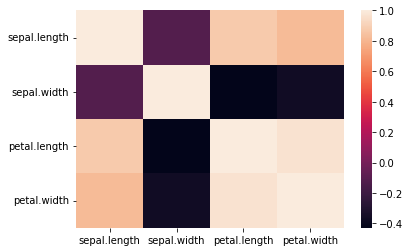

In [11]:
corr=df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);

Grafiğin daha anlaşılabilir olması için belirli parametreler verebiliriz.

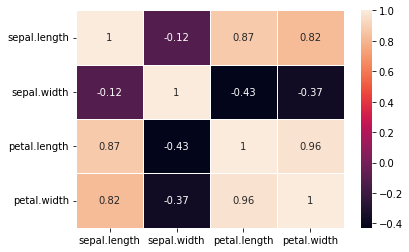

In [12]:
corr=df.corr()
sns.heatmap(corr, 
annot = True,linewidth = 0.5);
#annot = True parametresi sayıların gözükmesini sağlar.
 #linewidth = 0.5 ise kutucukların arasına verilen değer kadar boşluk açar.

Veri çerçevemizin hedef değişkeninin "variety" benzersiz değerlerini görüntüleyelim.

In [13]:
df["variety"].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

Veri çerçevemizin hedef değişkeninin "variety" benzersiz kaç adet değer içerdiğini görüntüleyelim.

In [14]:
df["variety"].nunique()

3

Veri çerçevesindeki sepal.width ve sepal.length değişkenlerinin sürekli olduğunu görüyoruz. Bu iki sürekli veriyi görselleştirmek için önce scatterplot kullanalım.

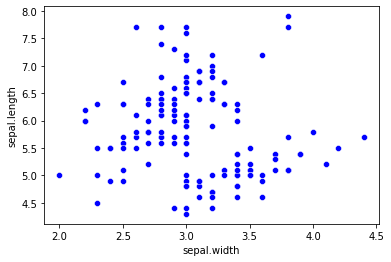

In [15]:
sns.scatterplot(x = "sepal.width", y = "sepal.length", data = df, color = "blue");

Aynı iki veriyi daha farklı bir açıdan frekanslarıyla incelemek için jointplot kullanarak görselleştirelim. 

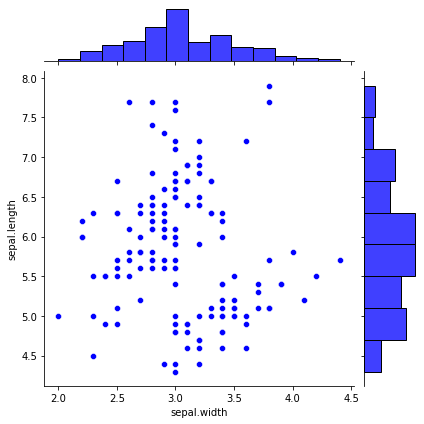

In [16]:
sns.jointplot(x = "sepal.width", y = "sepal.length", data = df, color = "blue");

Aynı iki veriyi scatterplot ile tekrardan görselleştirelim fakat bu sefer "variety" parametresi ile hedef değişkenine göre kırdıralım. 

3 farklı renk arasında sepal değişkenleriyle bir kümeleme yapılabilir mi? Ne kadar ayırt edilebilir bunun üzerine düşünelim.

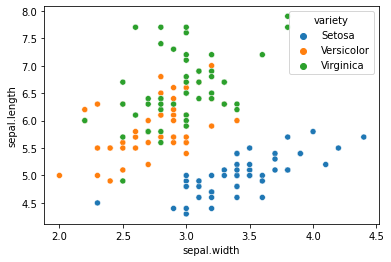

In [17]:
sns.scatterplot(x = "sepal.width", y = "sepal.length", hue = "variety", data=df);

value_counts() fonksiyonu ile veri çerçevemizin ne kadar dengeli dağıldığını sorgulayalım. 

In [18]:
df["variety"].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

Keman grafiği çizdirerek sepal.width değişkeninin dağılımını inceleyin. 

Söz konusu dağılım bizim için ne ifade ediyor, normal bir dağılım olduğunu söyleyebilir miyiz?

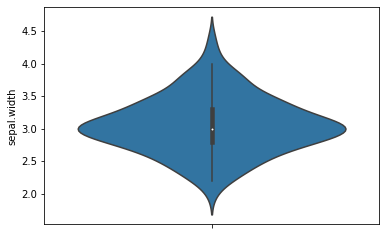

In [19]:
sns.violinplot(y = "sepal.width", data = df);

Daha iyi anlayabilmek için sepal.width üzerine bir distplot çizdirelim.

****distplot() metodu tek değişkenli bir dağılıma hızlıca göz atmanın en kolay yolu.


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


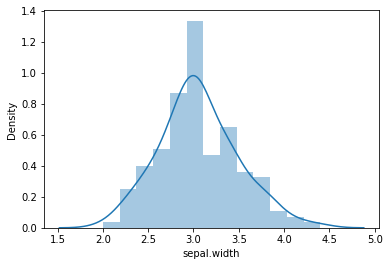

In [20]:
sns.distplot(df["sepal.width"]);

Üç çiçek türü için üç farklı keman grafiğini sepal.length değişkeninin dağılımı üzerine tek bir satır ile görselleştirelim.

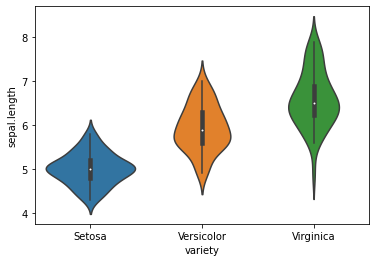

In [21]:
sns.violinplot(x = "variety", y = "sepal.length", data = df);

Hangi çiçek türünden kaçar adet gözlem barındırıyor veri çerçevemiz?

50 x 3 olduğunu ve dengeli olduğunu value_counts ile zaten görmüştük, ancak bunu görsel olarak ifade etmek için sns.countplot() fonksiyonuna variety parametresini vereilm.

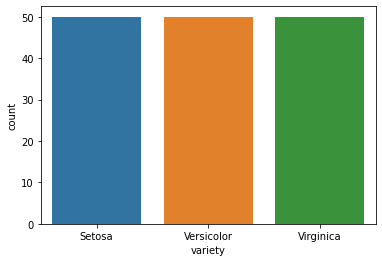

In [22]:
sns.countplot(x = "variety", data = df);

sepal.length ve sepal.width değişkenlerini sns.jointplot ile görselleştirelim, dağılımı ve dağılımın frekansı yüksek olduğu bölgelerini inceleyelim.

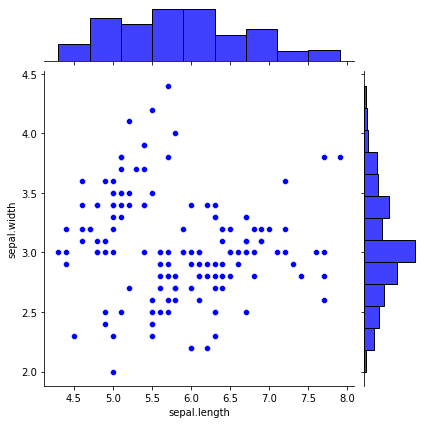

In [23]:
sns.jointplot(x = "sepal.length", y = "sepal.width", data = df, color = "blue");

Bir önceki hücrede yapmış olduğumuz görselleştirmeye kind = "kde" parametresini ekleyelim. Böylelikle dağılımın noktalı gösterimden çıkıp yoğunluk odaklı bir görselleştirmeye dönüştüğünü görmüş olacağız.

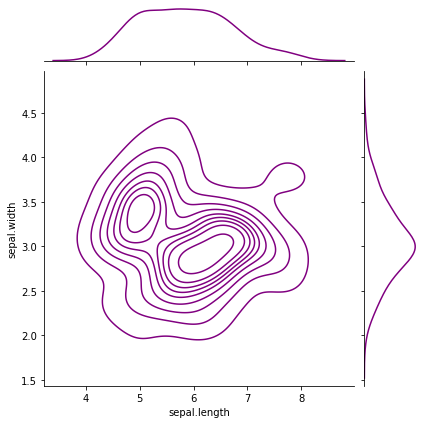

In [24]:
sns.jointplot(x = df["sepal.length"], y = df["sepal.width"],kind ="kde", color = "purple");

scatterplot ile petal.length ve petal.width değişkenlerinin dağılımlarını çizdirelim.

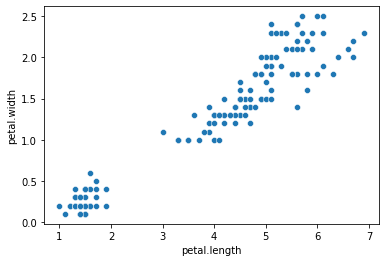

In [25]:
sns.scatterplot(x = "petal.length", y = "petal.width", data = df);

Aynı görselleştirmeye hue = "variety" parametresini ekleyerek 3. bir boyut verelim.

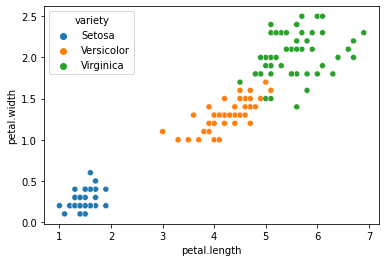

In [26]:
sns.scatterplot(x = "petal.length", y = "petal.width",hue = "variety", data = df);

sns.lmplot() görselleştirmesini petal.length ve petal.width değişkenleriyle implemente edelim. Petal length ile petal width arasında ne tür bir ilişki var ve bu ilişki güçlü müdür? sorusunu yanıtlayalım.

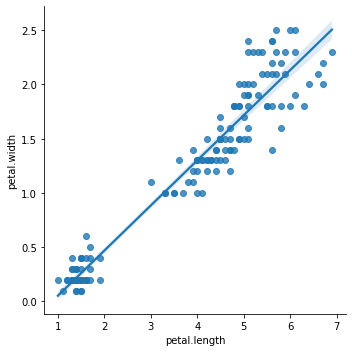

In [27]:
sns.lmplot(x = "petal.length", y = "petal.width", data = df);

Bu sorunun yanıtını pekiştirmek için iki değişken arasında korelasyon katsayısını yazdıralım. 

In [28]:
df.corr()["petal.length"]["petal.width"]

0.962865431402796

Petal Length ile Sepal Length değerlerini toplayarak yeni bir total length özniteliği oluşturalım.

In [29]:
df["total_length"] = df["petal.length"] + df["sepal.length"]

total.length'in ortalama değerini yazdıralım. 

In [30]:
df["total_length"].mean()

9.601333333333338

total.length'in standart sapma değerini yazdıralım.

In [31]:
df["total_length"].std()

2.5200401260964997

sepal.length'in maksimum değerini yazdıralım.

In [32]:
df["sepal.length"].max()

7.9

sepal.length'i 5.5'den büyük ve türü setosa olan gözlemleri yazdıralım.

In [33]:
df[(df["sepal.length"] > 5.5) & (df["variety"] == "Setosa")]

,sepal.length,sepal.width,petal.length,petal.width,variety,total_length
14,5.8,4.0,1.2,0.2,Setosa,7.0
15,5.7,4.4,1.5,0.4,Setosa,7.2
18,5.7,3.8,1.7,0.3,Setosa,7.4


petal.length'i 5'den küçük ve türü virginica olan gözlemlerin sadece sepal.length ve sepal.width değişkenlerini ve değerlerini yazdıralım.

In [34]:
df[(df["petal.length"] < 5) & (df["variety"] == "Virginica")][["sepal.length","sepal.width"]]

,sepal.length,sepal.width
106,4.9,2.5
121,5.6,2.8
123,6.3,2.7
126,6.2,2.8
127,6.1,3.0
138,6.0,3.0


Hedef değişkenimiz variety'e göre bir gruplama işlemi yapalım değişken değerlerimizin ortalamasını görüntüleyelim.

In [35]:
df.groupby(["variety"]).mean()

,sepal.length,sepal.width,petal.length,petal.width,total_length
variety,,,,,
Setosa,5.006,3.428,1.462,0.246,6.468
Versicolor,5.936,2.770,4.260,1.326,10.196
Virginica,6.588,2.974,5.552,2.026,12.140


Hedef değişkenimiz variety'e göre gruplama işlemi yaparak sadece petal.length değişkenimizin standart sapma değerlerini yazdıralım. 

In [36]:
df.groupby(["variety"])["petal.length"].std()

variety
Setosa        0.173664
Versicolor    0.469911
Virginica     0.551895
Name: petal.length, dtype: float64

Emeğiniz, ayırdığınız vakit ve ilginiz için teşekkürler.